<a href="https://colab.research.google.com/github/dipayandas97/Keras_Notebook/blob/master/Univariate_Time_Series_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from google.colab import files
import io

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [0]:
dataset = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv


In [0]:
data = pd.read_csv(io.BytesIO(dataset['international-airline-passengers.csv']))
data = data.values

In [0]:
def create_dataset(s,w):
  dataX, dataY = [],[]
  for i in range(len(s)-w):
    dataX.append(s[i:w+i,0])
    dataY.append(s[w+i,0])
  return np.array(dataX), np.array(dataY)

In [0]:
series,test_data = data[0:100,1],data[100:144,1]
series = series.astype('int16').reshape(100,1)
test_data = test_data.astype('int16').reshape(test_data.shape[0],1)

scaler = MinMaxScaler(feature_range=(0,1))
test_data = scaler.fit_transform(test_data)
series = scaler.fit_transform(series)


window = 5

X_train, y_train = create_dataset(series,window)
X_test,y_test = create_dataset(test_data,window)

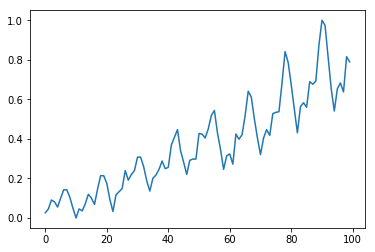

In [0]:
plt.plot(series)
plt.show()

95

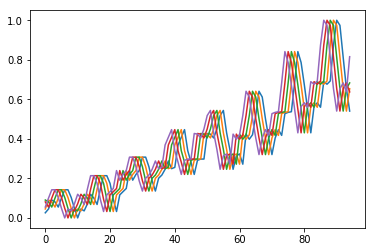

In [0]:
plt.plot(X_train)
plt.show
X_train.shape[0]

<function matplotlib.pyplot.show>

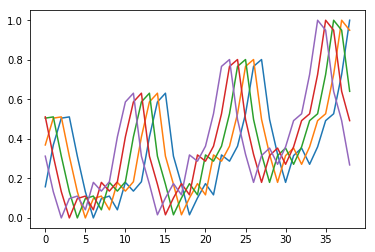

In [0]:
plt.plot(X_test)
plt.show

In [0]:
#reshape input

X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))


In [0]:

model = Sequential()
model.add(LSTM(4, input_dim=window))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 5))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [0]:

model.fit(X_train,y_train, epochs=100, validation_split=0.2, batch_size=1, verbose=2)

Train on 76 samples, validate on 19 samples
Epoch 1/100
 - 1s - loss: 0.0518 - acc: 0.0132 - val_loss: 0.1586 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.0233 - acc: 0.0132 - val_loss: 0.0821 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.0168 - acc: 0.0132 - val_loss: 0.0592 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.0155 - acc: 0.0132 - val_loss: 0.0504 - val_acc: 0.0526
Epoch 5/100
 - 0s - loss: 0.0145 - acc: 0.0132 - val_loss: 0.0478 - val_acc: 0.0526
Epoch 6/100
 - 0s - loss: 0.0137 - acc: 0.0132 - val_loss: 0.0425 - val_acc: 0.0526
Epoch 7/100
 - 0s - loss: 0.0129 - acc: 0.0132 - val_loss: 0.0380 - val_acc: 0.0526
Epoch 8/100
 - 0s - loss: 0.0124 - acc: 0.0132 - val_loss: 0.0372 - val_acc: 0.0526
Epoch 9/100
 - 0s - loss: 0.0121 - acc: 0.0132 - val_loss: 0.0340 - val_acc: 0.0526
Epoch 10/100
 - 0s - loss: 0.0115 - acc: 0.0132 - val_loss: 0.0330 - val_acc: 0.0526
Epoch 11/100
 - 0s - loss: 0.0113 - acc: 0.0132 - val_loss: 0.0322 - val_acc: 0.0526
Epoch 12/100
 - 0s

95/95 [==============================] - 0s 73us/step
RMSE :  0.07914623709130471


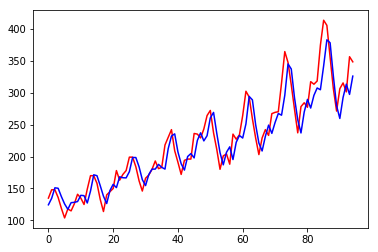

In [0]:
prediction = model.predict(X_train)
score = model.evaluate(X_train,y_train)
rmse = math.sqrt(mean_squared_error(y_train, prediction))
print('RMSE : ',rmse)

plt.plot(scaler.inverse_transform(series[window:,:]),color='red')
plt.plot(scaler.inverse_transform(prediction),color='blue')
plt.show()


<function matplotlib.pyplot.show>

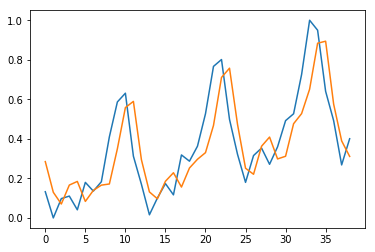

In [0]:
test_pred = model.predict(X_test)
plt.plot(y_test.reshape(y_test.shape[0],1))
plt.plot(test_pred)
plt.show